In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.stem import WordNetLemmatizer 
Lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv


In [2]:
df = pd.read_csv("/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv", encoding='latin-1')

df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [3]:
df.drop(labels=['reviewer_id', 'store_name', 'category'], inplace=True, axis=1)

In [4]:
df.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [5]:
s = ""

for review in df['review']:
    s += str(review)

remove_char = []
    
for char in set(s):
    if char not in ''.join(filter(str.isalnum, set(s))):
        remove_char.append(char)

remove_char

['$',
 '<',
 '\n',
 '+',
 '*',
 '.',
 ';',
 '"',
 '\\',
 '[',
 '{',
 '~',
 '/',
 '>',
 '^',
 '&',
 '=',
 '#',
 ':',
 '-',
 '!',
 '¿',
 '@',
 ',',
 ' ',
 '%',
 ']',
 '}',
 ')',
 '_',
 '?',
 '(',
 "'"]

In [6]:
filtered_text = []

for review in df['review']:
    for char in remove_char:
        if char in str(review) and char != " ":
            review = review.replace(char, "")
    
    filtered_text.append(str(review).lower())

In [7]:
df['review'] = filtered_text

In [8]:
def get_simple_pos(tag):
    
    tag = str(tag)
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [9]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [10]:
lemmatized_text = []

for sentence in df['review']:

    temp = []

    for word in sentence.split(" "):
        if word.lower() not in STOPWORDS:
            try:
                temp.append(Lemmatizer.lemmatize(word.lower(), pos =get_simple_pos(pos_tag(word_tokenize(word.lower()), tagset='universal')[0][1])))
            except:
                pass

    lemmatized_text.append(temp)

In [11]:
df['review'].head()

0    why does it look like someone spit on my foodi...
1    itd mcdonalds it is what it is as far as the f...
2    made a mobile order got to the speaker and che...
3    my mc crispy chicken sandwich was ï½ï½ï½ï½ï½ï½...
4    i repeat my order 3 times in the drive thru an...
Name: review, dtype: object

In [12]:
df['review'] = lemmatized_text

In [13]:
df['review'].head()

0    [look, someone, spit, foodi, normal, transacti...
1    [itd, mcdonalds, far, food, atmosphere, go, st...
2    [make, mobile, order, get, speaker, checked, i...
3    [mc, crispy, chicken, sandwich, ï½ï½ï½ï½ï½ï½ï½...
4    [repeat, order, 3, time, drive, thru, still, m...
Name: review, dtype: object

In [14]:
def join_text(text):
    string = ''
    for i in text:
        string += i.strip() +' '
    return string  

In [15]:
df.review = df.review.apply(join_text)

In [16]:
df['review'].head()

0    look someone spit foodi normal transaction eve...
1    itd mcdonalds far food atmosphere go staff mak...
2    make mobile order get speaker checked inline m...
3    mc crispy chicken sandwich ï½ï½ï½ï½ï½ï½ï½ï½ï½ï...
4    repeat order 3 time drive thru still manage me...
Name: review, dtype: object

In [17]:
def labels(label):
    for char in label:
        try:
            return int(char)
        except:
            pass

In [18]:
train_text = df['review'][:int(df.shape[0]*.7)]
test_text = df['review'][int(df.shape[0]*.7):]

train_rating = df['rating'][:int(df.shape[0]*.7)].apply(labels)
test_rating = df['rating'][int(df.shape[0]*.7):].apply(labels)

In [19]:
max([len(s.split(" ")) for s in df['review']]), min([len(s.split(" ")) for s in df['review']]), sum([len(s.split(" ")) for s in df['review']])/df.shape[0]

(263, 1, 12.542520062282907)

In [20]:
HT = {}

i = 1
for entry in df['review']:
    for word in entry.split(" "):
        
        if word not in HT:
            HT[word] = i
            i += 1
    
# print(HT)

Distinct Vocabulary

In [21]:
len(HT)

16162

In [22]:
encoded_train_texts = []

for sentence in train_text:
        
        arr = sentence.split(" ")

        temp = []

        for entry in arr[0:len(arr) - 1]:

            temp.append(HT[entry])

        encoded_train_texts.append(temp)
        
print("----Done----")

----Done----


In [23]:
encoded_test_texts = []

for sentence in test_text:
        
        arr = sentence.split(" ")

        temp = []

        for entry in arr[0:len(arr) - 1]:

            temp.append(HT[entry])

        encoded_test_texts.append(temp)
        
print("----Done----")

----Done----


In [24]:
from keras.utils import pad_sequences

max_words = 20

X_train = pad_sequences(np.array(encoded_train_texts), maxlen=max_words)
X_test = pad_sequences(np.array(encoded_test_texts), maxlen=max_words)

y_train = train_rating
y_test = test_rating

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [25]:
# One-hot encode the y vectors

one_hot_y_train = []
one_hot_y_test = []

for entry in y_train:
    temp = [0]*5
    temp[int(entry)-1] = 1
    
    one_hot_y_train.append(temp)

for entry in y_test:
    temp = [0]*5
    temp[int(entry)-1] = 1
    
    one_hot_y_test.append(temp)

<Axes: >

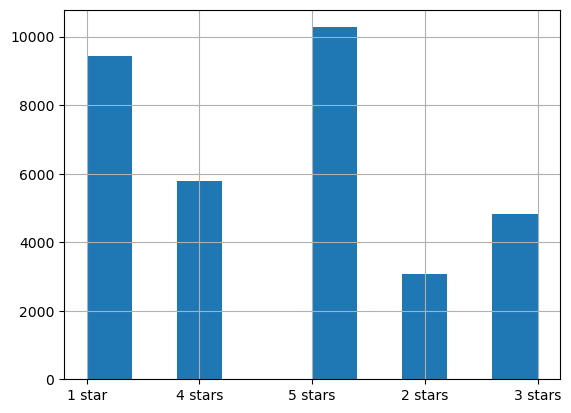

In [26]:
df['rating'].hist()

In [27]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y=y_train)

class_weights = dict(enumerate(class_weights))

In [28]:
from keras import Sequential, layers

embedding_size = 20

model = Sequential()

model.add(layers.Embedding(16162 + 1, embedding_size, input_length=embedding_size))

model.add(layers.Bidirectional(layers.LSTM(100)))

model.add(layers.Dense(5, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, np.array(one_hot_y_train), batch_size=32, epochs=10, validation_data=(X_test, np.array(one_hot_y_test)), class_weight=class_weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 20)            323260    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              96800     
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 1005      
                                                                 
Total params: 421,065
Trainable params: 421,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
731/731 [==============================] - 46s 47ms/step - loss: 1.2134 - accuracy: 0.5047 - val_loss: 1.0623 - val_accuracy: 0.5640
Epoch 2/10
731/731 [==============================] - 11s 16ms/step - loss: 0.9765 - accuracy: 0.6163 - 

In [29]:
from sklearn.metrics import classification_report

temp = model.predict(X_test)

y_pred = []

for entry in temp:
    entry = list(entry)
    
    if entry.index(max(entry)) == 0:
        y_pred.append(1)
    elif entry.index(max(entry)) == 1:
        y_pred.append(2)
    elif entry.index(max(entry)) == 2:
        y_pred.append(3)
    elif entry.index(max(entry)) == 3:
        y_pred.append(4)
    elif entry.index(max(entry)) == 4:
        y_pred.append(5)


target_names = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars'] # target values

# Print classification report after a train/test split:
print(classification_report(y_test, y_pred, target_names=target_names))

314/314 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

      1 star       0.77      0.74      0.76      3329
     2 stars       0.34      0.50      0.41       960
     3 stars       0.47      0.42      0.44      1204
     4 stars       0.44      0.47      0.45      1546
     5 stars       0.74      0.67      0.71      2980

    accuracy                           0.62     10019
   macro avg       0.55      0.56      0.55     10019
weighted avg       0.63      0.62      0.62     10019

